# Carregando libs

In [2]:
import pandas as pd
import numpy as np

import scipy.stats as stats


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Carregando dados

In [3]:
df = pd.read_csv('Banco_avaliação_1.csv', sep=';')
df.head(10)

,Pront+A1:Q146uario,idade,Passado de malária,Est.Civ.,Renda salario mínimo,Malárias,Gesta,Paridade,Trimestre,Hemoglob.,Hematóc,Plaquetas,Colester,Triglic,LDL,HDL,VLDL
0,13942,17,Vivax,u e,1,0,3,2,3,7.9,27.1,144,286,235,186,65,47
1,79078,24,vivax e falciparum,u e,2,2,3,2,3,10.0,32.9,274,188,220,82,71,44
2,28811,29,vivax,cas,1,2,7,6,2,10.8,35.6,258,233,136,154,57,27
3,24600,40,Mista,u e,1,3,12,11,3,10.4,33.9,169,196,192,98,64,38
4,18582,17,falciparum,solt,2,1,1,0,3,13.3,38.4,296,163,340,56,46,68
5,5181,30,vivax,cas,1,1,3,1,3,11.2,37.1,204,211,345,80,52,69
6,10156,23,vivax,cas,2,1,4,3,3,11.6,37.1,137,158,225,80,33,45
7,35334,18,vivax,u e,1,2,2,1,2,12.5,24.2,675,220,195,123,62,39
8,9370,28,vivax,u e,1,1,5,4,3,10.4,33.0,231,204,190,128,48,38
9,36055,20,vivax,u e,1,1,1,0,3,10.1,31.6,164,276,568,121,54,114


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pront+A1:Q146uario    117 non-null    object 
 1   idade                 118 non-null    int64  
 2   Passado de malária    116 non-null    object 
 3   Est.Civ.              118 non-null    object 
 4   Renda salario mínimo  118 non-null    int64  
 5   Malárias              118 non-null    int64  
 6   Gesta                 118 non-null    int64  
 7   Paridade              118 non-null    int64  
 8   Trimestre             118 non-null    int64  
 9   Hemoglob.             118 non-null    float64
 10  Hematóc               118 non-null    float64
 11  Plaquetas             118 non-null    int64  
 12  Colester              118 non-null    int64  
 13  Triglic               118 non-null    int64  
 14  LDL                   118 non-null    int64  
 15  HDL                   1

#Análise descritiva

##Classifique as variáveis

In [5]:
df.columns

Index(['Pront+A1:Q146uario', 'idade', 'Passado de malária', 'Est.Civ.',
       'Renda salario mínimo', 'Malárias', 'Gesta', 'Paridade', 'Trimestre',
       'Hemoglob.', 'Hematóc', 'Plaquetas', 'Colester', 'Triglic', 'LDL',
       'HDL', 'VLDL'],
      dtype='object')

'Pront+A1:Q146uario': valor ID, não classificável
'idade': Quantitativa discreta
'Passado de malária': Qualitativa nominal
'Est.Civ.': Qualitativa nominal
'Renda salario mínimo': Quantitativa discreta
'Malárias': Quantitativa discreta
'Gesta': Quantitativa discreta
'Paridade': Quantitativa discreta
'Trimestre': Qualitativa ordinal
'Hemoglob.': Quantitativa contínua
'Hematóc': Quantitativa contínua
'Plaquetas': Quantitativa discreta
'Colester': Quantitativa discreta
'Triglic': Quantitativa discreta
'LDL': Quantitativa discreta
'HDL': Quantitativa discreta
'VLDL': Quantitativa discreta

##Corrigindo inconsistências no dataset

In [6]:
df['Passado de malária'].unique() #há alguns valores escritos diferentes que se referem a mesma coisa

array(['Vivax', 'vivax e falciparum', 'vivax ', 'Mista ', ' falciparum',
       'vivax', 'falciparum', nan], dtype=object)

In [7]:
df['Passado de malária'].replace('vivax e falciparum','Mista ', inplace = True)
df['Passado de malária'].replace('Vivax','vivax', inplace = True)
df['Passado de malária'].replace('vivax ','vivax', inplace = True)
df['Passado de malária'].replace(' falciparum','falciparum', inplace = True)


In [8]:
df['Passado de malária'].unique()

array(['vivax', 'Mista ', 'falciparum', nan], dtype=object)

In [9]:
df['Est.Civ.'].unique() #a mesma coisa acontece para estado civil

array(['u e', 'cas', 'solt', 'u e '], dtype=object)

In [10]:
df['Est.Civ.'].replace('u e ','União Estável', inplace = True)
df['Est.Civ.'].replace('u e','União Estável', inplace = True)
df['Est.Civ.'].replace('solt','Solteiro', inplace = True)
df['Est.Civ.'].replace('cas','Casado', inplace = True)

In [11]:
df['Est.Civ.'].unique() #a mesma coisa acontece para estado civil

array(['União Estável', 'Casado', 'Solteiro'], dtype=object)

##Apresentação das variáveis qualitativas

In [12]:
qualitativas = df[['Passado de malária','Est.Civ.','Trimestre']].copy()
qualitativas.head(10)

,Passado de malária,Est.Civ.,Trimestre
0,vivax,União Estável,3
1,Mista,União Estável,3
2,vivax,Casado,2
3,Mista,União Estável,3
4,falciparum,Solteiro,3
5,vivax,Casado,3
6,vivax,Casado,3
7,vivax,União Estável,2
8,vivax,União Estável,3
9,vivax,União Estável,3


###tabela de frequência

In [13]:
qualitativas['Trimestre'] = qualitativas.Trimestre.astype(object) #mudando o tipo da variável

In [14]:
freq1 = qualitativas['Passado de malária'].value_counts()
percent1 = qualitativas['Passado de malária'].value_counts(normalize=True).round(4)*100

dist1 = pd.DataFrame({'Frequência': freq1,
                      'Porcentagem (%)': percent1})
dist1 = dist1.rename_axis('Passado de malária', axis= 'columns')
dist1

Passado de malária,Frequência,Porcentagem (%)
vivax,96,82.76
falciparum,15,12.93
Mista,5,4.31


In [15]:
freq2 = qualitativas['Est.Civ.'].value_counts()
percent2 = qualitativas['Est.Civ.'].value_counts(normalize=True).round(4)*100

dist2 = pd.DataFrame({'Frequência': freq2,
                      'Porcentagem(%)': percent2})
dist2 = dist2.rename_axis('Estado Civil', axis= 'columns')
dist2

Estado Civil,Frequência,Porcentagem(%)
União Estável,62,52.54
Casado,35,29.66
Solteiro,21,17.80


In [16]:
freq3 = qualitativas['Trimestre'].value_counts()
percent3 = qualitativas['Trimestre'].value_counts(normalize=True).round(4)*100

dist3 = pd.DataFrame({'Frequência': freq3,
                      'Porcentagem(%)': percent3})
dist3= dist3.rename_axis('Trimestre', axis= 'columns')
dist3

Trimestre,Frequência,Porcentagem(%)
3,66,55.93
2,42,35.59
1,10,8.47


##Apresentação de 2 variáveis quantitativas contínuas

In [17]:
df[['Hemoglob.','Hematóc']].describe()

,Hemoglob.,Hematóc
count,118.000000,118.000000
mean,10.151695,33.226271
std,2.403051,7.493580
min,7.000000,20.300000
25%,8.825000,29.400000
50%,9.500000,31.800000
75%,10.600000,34.150000
max,22.300000,71.100000


Notas:
1. 

##Apresentação de 2 variáveis quantitativas discretas

In [18]:
df[['idade','Renda salario mínimo']].describe()

,idade,Renda salario mínimo
count,118.000000,118.000000
mean,24.161017,1.279661
std,6.692221,0.568182
min,14.000000,1.000000
25%,18.000000,1.000000
50%,24.000000,1.000000
75%,29.000000,1.000000
max,43.000000,4.000000


Notas:
1. 

##Apresentação da relação entre 2 variáveis qualitativas

In [19]:
quali = df[['Passado de malária','Est.Civ.','Trimestre']].copy()
quali = quali.rename(columns={'Est.Civ.': 'Estado Civil'})
quali.head()

,Passado de malária,Estado Civil,Trimestre
0,vivax,União Estável,3
1,Mista,União Estável,3
2,vivax,Casado,2
3,Mista,União Estável,3
4,falciparum,Solteiro,3


###Relação entre estado civil e passado da malária

In [20]:
quali_crosstab = pd.crosstab(quali['Estado Civil'],
                             quali['Passado de malária'],
                             margins=True,
                             margins_name='Total',
                             normalize=True)
quali_crosstab

Passado de malária,Mista,falciparum,vivax,Total
Estado Civil,,,,
Casado,0.008621,0.051724,0.232759,0.293103
Solteiro,0.000000,0.034483,0.146552,0.181034
União Estável,0.034483,0.043103,0.448276,0.525862
Total,0.043103,0.129310,0.827586,1.000000


Notas:
1. Se destaca a quantidade de indivíduos com vivax na amostra, sendo 96 (82,75%) de um total de 116 observações.
2. Dito isso, para todos os estados civis, o passado de malária vivax é o que tem maior quantidade.
3. Já o passado de malária falciparum tem uma quantidade consideravelmente menor de casos em relação ao vivax, sendo 15 (12,93%) no total.
4. Há 5 indivíduos na amostra (4,31%) que apresentam ambos os passados de malária, falciparum e vivax.
4. Levando em consideração o estado civil, a união estável é a variável que possui maior quantidade de algum passado de malária, sendo 61 (52,59%) no total. Seguido de casados com 34 indivíduos (29,31%) e solteiros com 21 (18,10%).
5. O banco de dados possui 118 observações, logo, conclui-se que há dois valores nulos na variável passado de malária. Convém, posteriormente, fazer um estudo a respeito desses dados nulos.

##Apresentação da relação entre uma variável qualitativa com uma quantitativa

In [21]:
df.head()

,Pront+A1:Q146uario,idade,Passado de malária,Est.Civ.,Renda salario mínimo,Malárias,Gesta,Paridade,Trimestre,Hemoglob.,Hematóc,Plaquetas,Colester,Triglic,LDL,HDL,VLDL
0,13942,17,vivax,União Estável,1,0,3,2,3,7.9,27.1,144,286,235,186,65,47
1,79078,24,Mista,União Estável,2,2,3,2,3,10.0,32.9,274,188,220,82,71,44
2,28811,29,vivax,Casado,1,2,7,6,2,10.8,35.6,258,233,136,154,57,27
3,24600,40,Mista,União Estável,1,3,12,11,3,10.4,33.9,169,196,192,98,64,38
4,18582,17,falciparum,Solteiro,2,1,1,0,3,13.3,38.4,296,163,340,56,46,68


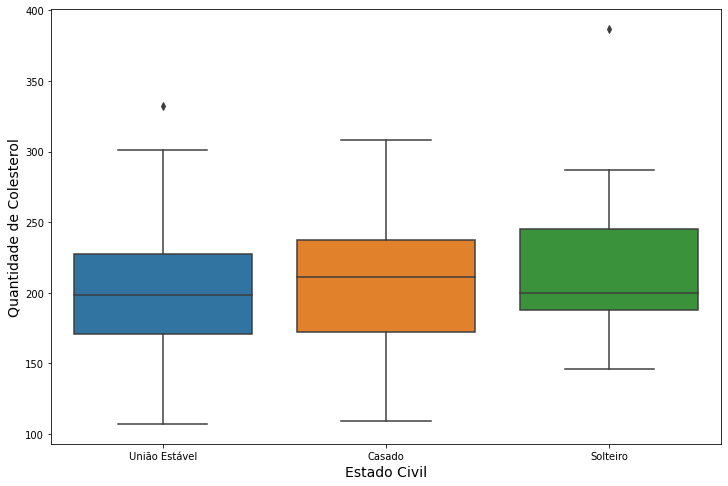

In [22]:
ax = sns.boxplot(x='Est.Civ.', y='Colester', data=df)
ax.figure.set_size_inches(12,8)
ax.set_xlabel('Estado Civil', fontsize=14)
ax.set_ylabel('Quantidade de Colesterol', fontsize=14)
ax;

Por meio do boxplot apresentado é possível notar que não há grandes diferenças entre a quantidade de colesterol para cada estado civil possível. Se destaca a mediana da quantidade de colesterol dos solteiros, que é aproximadamente 200 (mL? - não sei a medida) e está mais perto do 1° quartil, o que indica que a sua distribuição é assimétrica negativa, diferente do boxplot da união estável, que indica que esta segue uma distribuição normal. Contudo, para saber se a distribuição é gaussiana, é recomendando fazer um teste de normalidade para cada grupo. Além disso, é importante ressaltar a presença de Outliers, isto é, anomalias entre os dados. Eles aparecem no grupo união estável, onde o seu limiter superior é dado em 300 mL de quantidade de colesterol e o outliers se dá próximo de 340ml, o outro outlier se encontra entre os solteiros e seu valor se aproxima de 390, enquanto seu limiter superior é de pouco mais de 275ml.
